# Classification Experiments

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import heatmap
import numpy as np

## Gender

### Nouns, Adjectives, Both : split data into train and test  

In [68]:
df_nouns_we = pd.read_csv('../Data/FlauBERT_WE/all_nouns_we.csv').drop(columns=["gn"])
df_adj_we = pd.read_csv('../Data/FlauBERT_WE/all_adjectives_we.csv').drop(columns = "number")
df_both_we = pd.concat([df_nouns_we, df_adj_we], ignore_index=True)

# target : gender
Y_gd_N = df_nouns_we["gender"]
Y_gd_A = df_adj_we["gender"]
Y_gd_both = df_both_we["gender"]

# features : word embeddings dimensions
X_gd_N = df_nouns_we.drop(columns=["Word", "gender"])
X_gd_A = df_adj_we.drop(columns=["Word", "gender"])
X_gd_both = df_both_we.drop(columns = ["Word", "gender"] )

# split data into train and test sets
X_gd_N_train, X_gd_N_test, Y_gd_N_train, Y_gd_N_test = train_test_split(X_gd_N, Y_gd_N, test_size=0.2, random_state=42)
X_gd_A_train, X_gd_A_test, Y_gd_A_train, Y_gd_A_test = train_test_split(X_gd_A, Y_gd_A, test_size=0.2, random_state=42)
X_gd_both_train, X_gd_both_test, Y_gd_both_train, Y_gd_both_test = train_test_split(X_gd_both, Y_gd_both, test_size=0.2, random_state=42)

In [70]:
train_features = [X_gd_N_train, X_gd_A_train, X_gd_both_train]
test_features = [X_gd_N_test, X_gd_A_test, X_gd_both_test]
train_targets = [Y_gd_N_train, Y_gd_A_train, Y_gd_both_train]
test_targets = [Y_gd_N_test, Y_gd_A_test, Y_gd_both_test]

###  Decision Tree classification

In [71]:
cms = []
importances = []

for i in range(3):
    
    X_train, X_test, Y_train, Y_test = train_features[i], test_features[i], train_targets[i], test_targets[i]

    # Build a decision tree classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, Y_train)

    # Predict gender on the test set
    Y_pred = clf.predict(X_test)

    # Build a confusion matrix
    cms.append(confusion_matrix(Y_test, Y_pred))

    # Store the importance of each feature
    importances.append(clf.feature_importances_) 

Experiment 1:



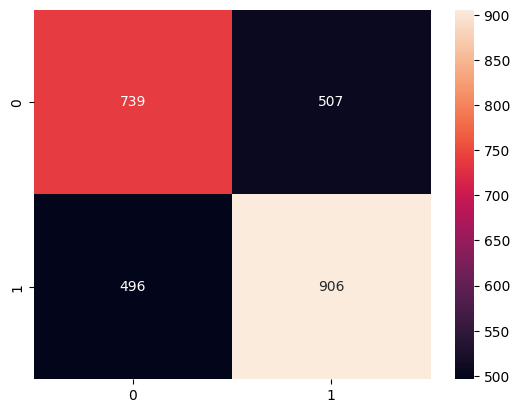

[100 250 470 195 245 499 434 162   5 316]
Experiment 2:



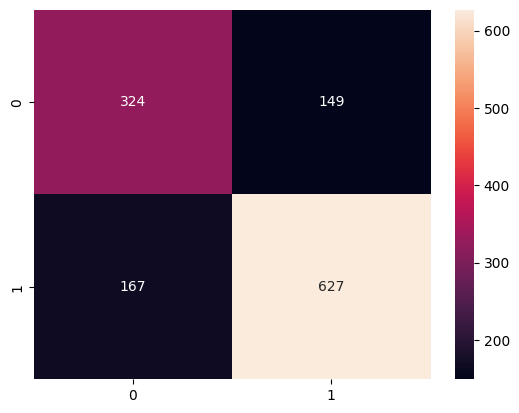

[466   5 507  57 234 250 379 390 511 432]
Experiment 3:



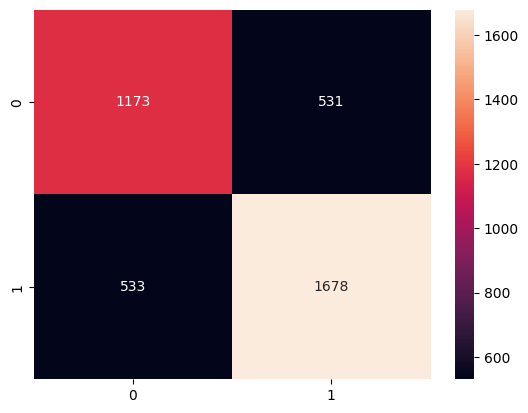

[245 192 195 377 162 507 133 117 121 487]


In [74]:
for i in range(3):

    print(f"Experiment {i+1}:\n")

    # Plot confusion matrix
    sns.heatmap(cms[i], annot=True, fmt="d")
    plt.show()

    # Plot top 10 most important features
    indices = np.argsort(importances[i])[::-1]
    print(indices[:10])